<a href="https://colab.research.google.com/github/giftahmed/CAR-MODEL-IN-ML/blob/main/Car_Price_Prediction_Using_Machine_Learning_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Using Machine Learning (Regression)

## 1. Project Overview

This project performs a **regression analysis** to predict **car prices (Amount in Million ₦)** using machine learning.

The dataset contains information such as:

* Location
* Maker (Brand)
* Model
* Year
* Colour
* Car Type
* Distance driven (Km)

Because the target variable (**Amount**) is a number, this is a **Regression problem**, not classification.

---

In [ ]:

## 2. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 3. Load the Dataset
df =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Car.xlsx')
df.head()

,Location,Maker,Model,Year,Colour,Amount (Million ₦),Type,Distance_Km
0,Abuja,Mercedes-Benz,GLA 250,2015,Brown,14.50,Foreign Used,50000.0
1,Abuja,Hyundai,Accent,2013,Red,1.55,Nigerian Used,NaN
2,Lagos,Lexus,GX 460 Premium,2011,White,14.00,Foreign Used,85000.0
3,Lagos,Lexus,ES 350,2011,Gray,4.95,Foreign Used,NaN
4,Ibadan,Toyota,Verso 1.6,2009,Silver,1.69,Nigerian Used,118906.0


In [ ]:
## 4. Data Understanding
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            4487 non-null   object 
 1   Maker               4487 non-null   object 
 2   Model               4487 non-null   object 
 3   Year                4487 non-null   int64  
 4   Colour              4487 non-null   object 
 5   Amount (Million ₦)  4487 non-null   float64
 6   Type                4487 non-null   object 
 7   Distance_Km         2932 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 280.6+ KB


,Year,Amount (Million ₦),Distance_Km
count,4487.000000,4487.000000,2.932000e+03
mean,2011.095610,11.309795,1.010383e+05
std,4.823362,20.585915,1.150914e+05
min,1982.000000,0.420000,1.000000e+00
25%,2008.000000,3.600000,5.237850e+04
50%,2011.000000,5.700000,7.900000e+04
75%,2014.000000,12.000000,1.099392e+05
max,2022.000000,454.000000,1.785448e+06


## 5. Data Cleaning Process

### 5.1 Remove Irrelevant Columns

The **Model** column has many unique values and is not beginner-friendly for learning, so it is removed.

In [ ]:
df.drop(columns=['Model'], inplace=True)


In [ ]:
### 5.2 Deduplication
df.duplicated().sum()


np.int64(23)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
### 5.3 Fix Structural Errors
for col in ['Location', 'Maker', 'Colour', 'Type']:
    df[col] = df[col].str.strip().str.title()

In [ ]:
df.head()

,Location,Maker,Year,Colour,Amount (Million ₦),Type,Distance_Km
0,Abuja,Mercedes-Benz,2015,Brown,14.50,Foreign Used,50000.0
1,Abuja,Hyundai,2013,Red,1.55,Nigerian Used,NaN
2,Lagos,Lexus,2011,White,14.00,Foreign Used,85000.0
3,Lagos,Lexus,2011,Gray,4.95,Foreign Used,NaN
4,Ibadan,Toyota,2009,Silver,1.69,Nigerian Used,118906.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4464 entries, 0 to 4486
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            4464 non-null   object 
 1   Maker               4464 non-null   object 
 2   Year                4464 non-null   int64  
 3   Colour              4464 non-null   object 
 4   Amount (Million ₦)  4464 non-null   float64
 5   Type                4464 non-null   object 
 6   Distance_Km         2932 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 279.0+ KB


### 5.4 Handle Missing Values

* **Distance_Km** → fill with median

In [ ]:
df['Distance_Km'].fillna(df['Distance_Km'].median(), inplace=True)


/tmp/ipython-input-960912233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance_Km'].fillna(df['Distance_Km'].median(), inplace=True)


In [ ]:

### 5.5 Data Validation
df.isnull().sum()
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4464 entries, 0 to 4486
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            4464 non-null   object 
 1   Maker               4464 non-null   object 
 2   Year                4464 non-null   int64  
 3   Colour              4464 non-null   object 
 4   Amount (Million ₦)  4464 non-null   float64
 5   Type                4464 non-null   object 
 6   Distance_Km         4464 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 279.0+ KB


## 6. Exploratory Data Analysis (EDA) – Beginner Friendly

### 6.1 Car Price Distribution

Text(0.5, 1.0, 'Car Price Distribution')

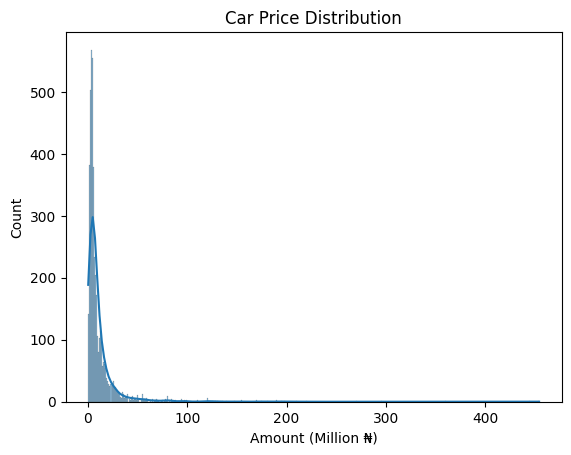

In [ ]:

sns.histplot(df['Amount (Million ₦)'], kde=True)
plt.title('Car Price Distribution')


Text(0.5, 1.0, 'Price by Car Type')

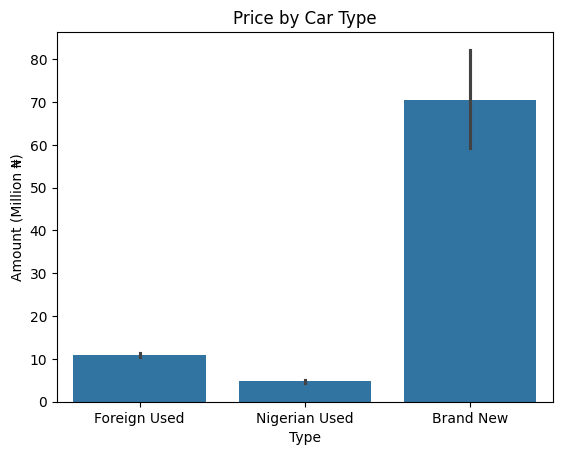

In [ ]:
### 6.2 Price by Car Type

sns.barplot(x='Type', y='Amount (Million ₦)', data=df)
plt.title('Price by Car Type')



**Observation:** Brand New cars are generally more expensive.

Text(0.5, 1.0, 'Price by Car Type')

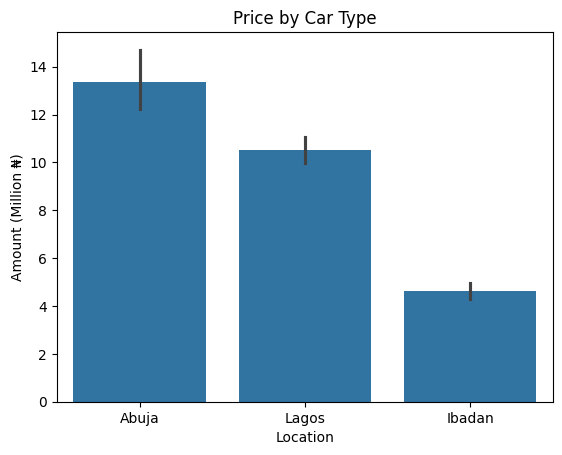

In [ ]:
sns.barplot(x='Location', y='Amount (Million ₦)', data=df)
plt.title('Price by Car Type')

Text(0.5, 1.0, 'Price by Car Type')

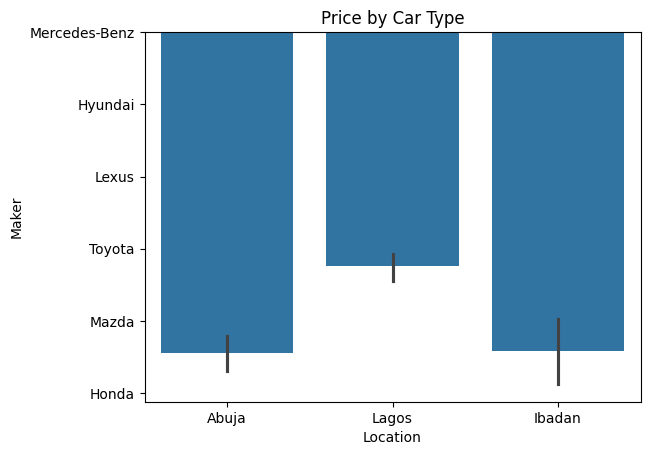

In [ ]:
sns.barplot(x='Location', y='Marker', data=df)
plt.title('Price by Car Type')


Text(0.5, 1.0, 'Car Year vs Price')

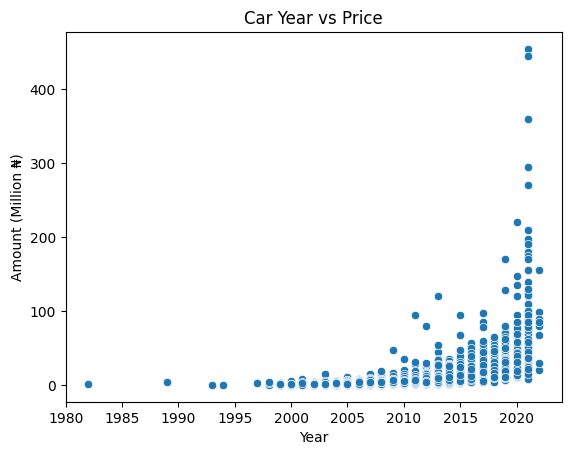

In [ ]:
### 6.3 Price vs Year
sns.scatterplot(x='Year', y='Amount (Million ₦)', data=df)
plt.title('Car Year vs Price')

**Observation:** Newer cars cost more.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 7. Feature Encoding

Machine learning models understand only numbers.


In [ ]:
le = LabelEncoder()

for col in ['Location', 'Maker', 'Colour', 'Type']:
    df[col] = le.fit_transform(df[col])

In [ ]:
## 8. Feature Scaling

X = df.drop('Amount (Million ₦)', axis=1)
y = df['Amount (Million ₦)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
## 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:

## 10. Regression Model Training

### 10.1 Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
### 10.2 Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [ ]:
### 10.3 Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
### 10.4 Gradient Boosting Regressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)


In [ ]:
## 11. Model Evaluation (Beginner Explanation)


results = [
    {
        'Model': 'Linear Regression',
        'MAE': mean_absolute_error(y_test, lr_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, lr_pred)),
        'R2 Score': r2_score(y_test, lr_pred)
    },
    {
        'Model': 'Decision Tree',
        'MAE': mean_absolute_error(y_test, dt_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, dt_pred)),
        'R2 Score': r2_score(y_test, dt_pred)
    },
    {
        'Model': 'Random Forest',
        'MAE': mean_absolute_error(y_test, rf_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
        'R2 Score': r2_score(y_test, rf_pred)
    },
    {
        'Model': 'Gradient Boosting',
        'MAE': mean_absolute_error(y_test, gb_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, gb_pred)),
        'R2 Score': r2_score(y_test, gb_pred)
    }
]

results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False)


,Model,MAE,RMSE,R2 Score
3,Gradient Boosting,4.073344,10.141466,0.542419
2,Random Forest,4.070733,10.337042,0.524600
1,Decision Tree,4.397238,10.853616,0.475899
0,Linear Regression,7.458696,12.271344,0.330037


In [ ]:
## 12. Predicting Price for a New Car
new_car = pd.DataFrame({
    'Location': [0],
    'Maker': [3],
    'Year': [2018],
    'Colour': [2],
    'Type': [1],
    'Distance_Km': [60000]
})

new_car_scaled = scaler.transform(new_car)
predicted_price = rf.predict(new_car_scaled)

print('Predicted Car Price (Million ₦):', predicted_price[0])


Predicted Car Price (Million ₦): 24.3285


## 13. Final Student Project Summary

### Project Title

Car Price Prediction Using Machine Learning

### Aim

To predict car prices based on vehicle characteristics using regression models.

### Conclusion

Gradient Boosting provided the best performance and can be used to estimate car prices effectively.

